In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder



In [15]:
#step 1 :- Load the dataset
df=pd.read_csv('crop_yield_prediction_accurate.csv')
df


,Year,Temperature (°C),Rainfall (mm),Soil Quality (pH),Crop Type,Fertilizer Used (kg/ha),Crop Yield (kg/ha)
0,2020,26.64,54.49,6.26,Wheat,151.40,5513.81
1,2022,32.82,65.14,6.42,Barley,182.05,3189.09
2,2022,24.28,168.89,6.00,Rice,228.74,5207.72
3,2020,29.59,279.35,5.67,Wheat,242.14,4994.33
4,2020,26.60,70.65,5.90,Rice,117.39,7003.09
...,...,...,...,...,...,...,...
495,2021,23.59,78.97,5.98,Maize,83.08,6403.03
496,2020,31.26,149.37,7.18,Soybean,227.86,2462.07
497,2022,22.77,145.91,6.63,Maize,65.36,5539.72
498,2019,21.89,144.36,6.95,Soybean,114.18,6774.97


In [18]:
# Step 2: Encode categorical variables (Crop Type)
encoder = LabelEncoder()
df["Crop Type"] = encoder.fit_transform(df["Crop Type"])

In [19]:
# Step 3: Define features (X) and target variable (y)
X = df[["Year", "Temperature (°C)", "Rainfall (mm)", "Soil Quality (pH)", "Crop Type", "Fertilizer Used (kg/ha)"]]
y = df["Crop Yield (kg/ha)"]

In [20]:
# Step 4: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
# Step 5: Train a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [22]:
# Step 6: Make predictions
y_pred = model.predict(X_test)

In [23]:
# Step 7: Evaluate the model
accuracy = r2_score(y_test, y_pred)
print(f"Model Accuracy (R² Score): {accuracy:.2f}")

Model Accuracy (R² Score): -0.11


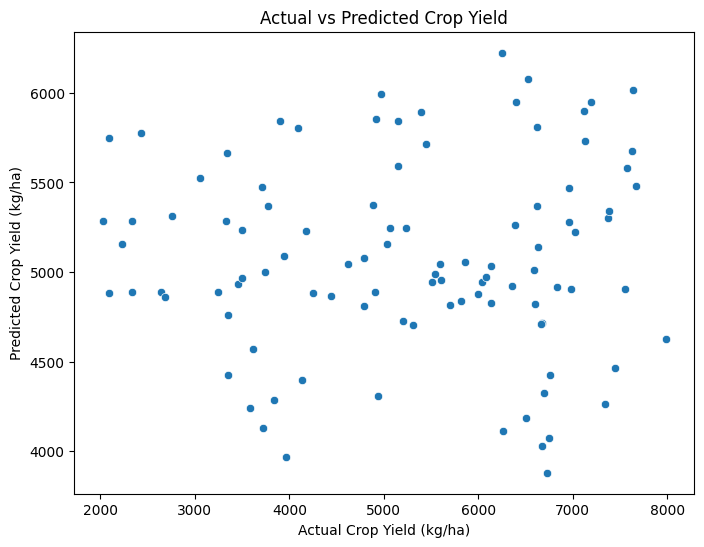

In [24]:
# Step 8: Plot actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Crop Yield (kg/ha)")
plt.ylabel("Predicted Crop Yield (kg/ha)")
plt.title("Actual vs Predicted Crop Yield")
plt.show()

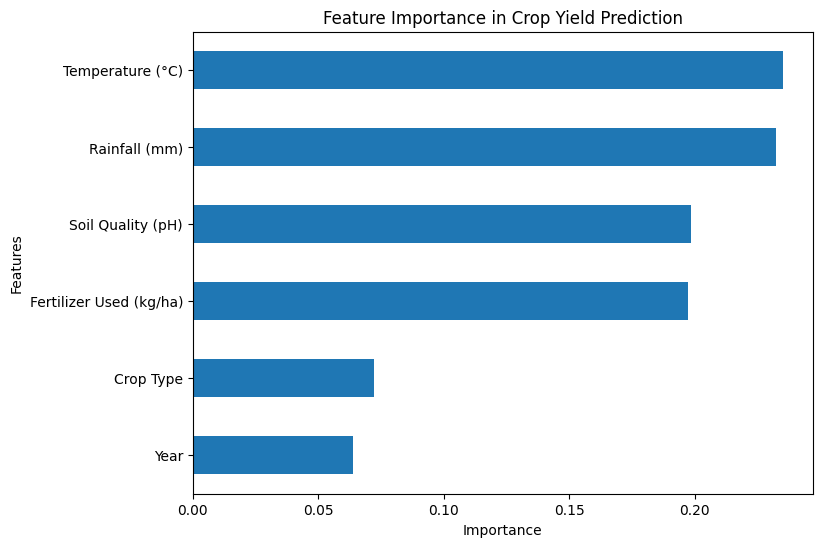

In [25]:
# Step 9: Visualize feature importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(8, 6))
feature_importance.sort_values().plot(kind='barh')
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Crop Yield Prediction")
plt.show()


In [1]:
pip install streamlit pandas scikit-learn matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.
